# <font color="red"><b>(Lecture 2) Neural Networks and Deep Learning</b></font>
<font color="red">Neural Networks and Embeddings for Natural Language Processing</font>

### <font color="#FF00FF">*Natural Language Processing: Zero to NLP*</font>

Outline:
- Download the Data
- Prepare Data for Training
- Logistic Regression Model
- Feed Forward Nueral Network


Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification

<font color="green">Lesson 2版本是Jovian原提供的，Lecture Video是課程實況中所呈現。<br>
Lesson 2適合在Kaggle上運行(尤其是最後要將結果送到Kaggle Competition，因為此Project的結果要在Kaggle評分時，只接受Kaggle Kernel的方式，不接受檔案upload的方式)，當然，要在在Colab上運行也可以。<br>
Lecture Video是在Colab上運行，才比較合適，課堂實況就是在Colab上操作</font>

<font color="green">Lesson 2 包含了兩個MODEL，第一個是`class
LogReg 模型` (Logistic Regression Model (Lesson 2))，第二個是`class FeedForwardModel 模型` (Feed Forward Neural Network)，在Kaggle環境下，可以分別運行的兩個模型，比較其結果的異同</font>

## Download the Data

### <font color="red">Lesson 2 (Kaggle合適用)</font>

In [ ]:
# !ls # 測試用

In [ ]:
import os

In [ ]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

In [ ]:
# kaggle專用
if IS_KAGGLE:
    data_dir = '../input/quora-insincere-questions-classification'
    train_fname = data_dir + '/train.csv'
    test_fname = data_dir + '/test.csv'
    sub_fname = data_dir + '/sample_submission.csv'
else:
    os.environ['KAGGLE_CONFIG_DIR'] = '.'
    !kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data
    train_fname = 'data/train.csv.zip'
    test_fname = 'data/test.csv.zip'
    sub_fname = 'data/sample_submission.csv.zip'

 96% 53.0M/54.9M [00:03<00:00, 17.0MB/s]
100% 54.9M/54.9M [00:03<00:00, 16.1MB/s]
 88% 14.0M/15.8M [00:01<00:00, 18.1MB/s]
100% 15.8M/15.8M [00:01<00:00, 12.4MB/s]
 98% 4.00M/4.09M [00:00<00:00, 6.23MB/s]
100% 4.09M/4.09M [00:00<00:00, 4.61MB/s]


In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sub_fname)

In [ ]:
# raw_df # train data的DataFrame

In [ ]:
# test_df

In [ ]:
# sub_df

In [ ]:
if IS_KAGGLE:
    sample_df = raw_df
else:
    sample_df = raw_df.sample(100_000, random_state=42)

### <font color="red">Lecture Video (Colab專用)<br>
Upload your `kaggle.json` file to Colab</font>

In [ ]:
# Colab 專用，Kaggle 就不需要
!chmod 600 ./kaggle.json

In [ ]:
import os

In [ ]:
# !pip install kaggle --upgrade # Colab 中不需要

In [ ]:
# Lecture Video - 作用：configure the path to “kaggle.json”.
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [ ]:
# Lecture Video - 從 kaggle 下載必要的 csv 檔案
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

 86% 47.0M/54.9M [00:00<00:00, 95.9MB/s]
100% 54.9M/54.9M [00:00<00:00, 97.6MB/s]
 32% 5.00M/15.8M [00:00<00:00, 42.2MB/s]
100% 15.8M/15.8M [00:00<00:00, 74.9MB/s]
100% 4.09M/4.09M [00:00<00:00, 42.3MB/s]
100% 4.09M/4.09M [00:00<00:00, 42.2MB/s]


In [ ]:
# Lecture Video - 設定檔案路徑
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sub_fname = 'data/sample_submission.csv.zip'

In [ ]:
import pandas as pd

In [ ]:
# 把training data，test data，submission data讀出，轉換成DataFrame
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sub_fname)

In [ ]:
# raw_df # train data的DataFrame

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
# test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
# sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
# Lecture Video(in Colab)
sample_df = raw_df.sample(100_000, random_state=42)

In [ ]:
# Lecture Video(in Colab)
# sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [ ]:
# Lecture Video - 查看一下
# sample_df.target.value_counts(normalize=True)

0    0.93962
1    0.06038
Name: target, dtype: float64

## Prepare Data for Training


Outline:
- Convert text to TF-IDF Vectors
- Split training & validation set
- Convert to PyTorch tensors

### Conversion to TF-IDF Vectors

<font color="red">Lecture Video(Colab) 與 Lesson 2(Kaggle) 共用</font>

[對文本重點字詞加權的TF-IDF方法](https://medium.com/datamixcontent-lab/f6a2790b4991)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize   # 將原文拆成字單位
from nltk.stem import SnowballStemmer    # 詞幹提取
from nltk.corpus import stopwords      # 停用詞(移除)
from sklearn.feature_extraction.text import TfidfVectorizer # 轉化原始文本為tf-idf的特徵舉陣

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = SnowballStemmer(language='english')

# 此 tokenize 函數 不包含 stopwords ，這之後執行 TfidfVectorizer 會產生 警示提醒
# def tokenize(text):
#     return [stemmer.stem(token) for token in word_tokenize(text)]

In [ ]:
# Lecture Video
# stemmer.stem('going'), stemmer.stem('gone'), stemmer.stem('butterflies')

('go', 'gone', 'butterfli')

In [ ]:
# Lecture Video
# word_tokenize('this is, something (new) ?')

['this', 'is', ',', 'something', '(', 'new', ')', '?']

In [ ]:
# Lecture Video
# tokenize('This is an amazing set of butterflies unexpectedly!')

['this', 'is', 'an', 'amaz', 'set', 'of', 'butterfli', 'unexpect', '!']

In [ ]:
# tokenize("Ain't nothin' (but a heartache)!")

['ai', "n't", 'nothin', "'", '(', 'but', 'a', 'heartach', ')', '!']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
# 修正，以解決之後 vectorizer.fit 時產生的警示
def tokenize(text):
    # return [stemmer.stem(token) for token in word_tokenize(text)]
    return [stemmer.stem(token) for token in word_tokenize(text) if token not in english_stopwords]

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True,
                token_pattern=None, # 解決第一個警示提醒，見下紅色字說明
                tokenizer=tokenize,
                # stop_words=english_stopwords, # 此功能放到tokenize函數中，解決第二個警示提醒
                max_features=1000)

<font color="red">以上 <b>vectorizer</b> 用在 <b>vectorizer.fit(sample_df.question_text)</b> 時，會出現以下兩個警告 <br>
警示1: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'<br>
警示2: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.<br>
注意，在不重啟工作階段，直接re-run 相同的 <b>vectorizer定義</b> 與 <b>vectorizer.fit(sample_df.question_text)</b> ，兩個警告會消失
</font>

[警示1-參考Solution](https://stackoverflow.com/questions/77149319/the-parameter-token-pattern-will-not-be-used-since-tokenizer-is-not-none)

[警示2-參考Solution](https://stackoverflow.com/questions/57340142/user-warning-your-stop-words-may-be-inconsistent-with-your-preprocessing)其中之一的解決方式如下



```python
import re

def tokenize_and_stem(text):
    """
    第一行中最先執行的是 nltk.sent_tokenize(text)，從此取出sent，也就是句子
    然後再執行 nltk.word_tokenize(sent)，從此取出word，也就是單詞。

    re.search 掃描整個字符串並返回第一個成功的匹配。
    """
    

    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    #exclude stopwords from stemmed words
    stems = [stemmer.stem(t) for t in filtered_tokens if t not in english_stopwords]

    return stems

vectorizer = TfidfVectorizer(lowercase=True,
                token_pattern=None,
                tokenizer=tokenize_and_stem,
                max_features=1000)
```



In [ ]:
# Lecture Video 顯示Series類型
# sample_df.question_text

443046     What is the most effective classroom managemen...
947549     Can I study abroad after 10th class from Bangl...
523769           How can I make friends as a college junior?
949821     How do I download free APK Minecraft: Pocket E...
1030397    Like Kuvera, is "Groww" also a free online inv...
                                 ...                        
998930     How do I research list of reliable charcoal im...
66641      What are petroleum products, and what is petro...
90024      What are some services that will let you quick...
130113     What credit card processors do online marketpl...
1137            On which number system does a computer work?
Name: question_text, Length: 100000, dtype: object

In [ ]:
%%time
# 訓練 vectorizer 模型
vectorizer.fit(sample_df.question_text)

CPU times: user 18.2 s, sys: 0 ns, total: 18.2 s
Wall time: 18.3 s


TfidfVectorizer(max_features=1000, token_pattern=None,
                tokenizer=<function tokenize at 0x78cbcb170700>)

In [ ]:
# Lecture Video
# vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

### Transform the questions into vectors

<font color="red">Lecture Video(Colab) 使用：<br>
`targets = sample_df.target` <br>
Lesson 2(Kaggle) 使用: <br>
`targets = sample_df.target.values`
</font>

In [ ]:
%%time
# 用 vectorizer 模型對 sample_df.question_text 進行轉換
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 18.2 s, sys: 0 ns, total: 18.2 s
Wall time: 18.2 s


<font color="red">注意vectorizer.transform()中要放iterator類型，因此<br>
vectorizer.transform(sample_df.question_text.values[0:1])是沒問題的，<br>
或是vectorizer.transform([sample_df.question_text.values[0]])，<br>
但不能是vectorizer.transform(sample_df.question_text.values[0])

In [ ]:
# 查看一下
# inputs.shape

(100000, 1000)

In [ ]:
# Lecture Video
# inputs[0].toarray()[:50]  # 有點多餘的寫法，inputs[0].toarray()是只有一個row，[:50]表示列出前50個row，所以顯示上沒有差異
# inputs[0].toarray()[0,:50] # 顯示第一row中的前50個column

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07905433, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
# 原 lesson 2 版本 (Lecture Video沒用這)
# targets = sample_df.target.values # 此為 ndarry，pytorch 要用的時候，不需要轉換

In [ ]:
# Lecture Video
targets = sample_df.target      # 此為 Series，pytorch 要用的時候，需要轉換

In [ ]:
# targets.shape

(100000,)

In [ ]:
%%time
# 用 vectorizer 模型對 test_df.question_text 進行轉換
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 13s, sys: 20.5 ms, total: 1min 13s
Wall time: 1min 16s


### Split training and validation set
<font color="red">Lecture Video 與 Lesson 2 共用</font>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [ ]:
# train_inputs.shape, val_inputs.shape # train_inputs與val_inputs類型都是sparse matrix of type

((70000, 1000), (30000, 1000))

In [ ]:
# train_targets.shape

(70000,)

In [ ]:
# train_targets

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# val_targets

array([0, 0, 0, ..., 0, 0, 0])

### Convert to PyTorch Tensors

In [ ]:
import torch  # 使用torch tensor
from torch.utils.data import TensorDataset, DataLoader # 建立 tensordataset 後建立 dataloader
import torch.nn.functional as F # 用binary_cross_entropy計算loss

#### <font color="red">Lecture Video</font>

In [ ]:
import torch.nn as nn # Lecture Video only 用來建立 Neural Network 的 model

In [ ]:
# type(train_inputs), type(train_targets)

(scipy.sparse._csr.csr_matrix, pandas.core.series.Series)

In [ ]:
"""(csr_matrix -> ndarray -> tensor + float化)"""
train_input_tensors = torch.tensor(train_inputs.toarray()).float()
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

In [ ]:
# train_input_tensors.shape, val_input_tensors.shape

(torch.Size([70000, 1000]), torch.Size([30000, 1000]))

In [ ]:
"""(Series -> ndarray -> tensor + float化)"""
train_target_tensors = torch.tensor(train_targets.values).float()
val_target_tensors = torch.tensor(val_targets.values).float()

In [ ]:
"""(csr_matrix -> ndarray -> tensor + float化) 實際上要到Make Predictions and Submit才會用到"""
test_input_tensors = torch.tensor(test_inputs.toarray()).float()

In [ ]:
# train_tensors.shape, val_tensors.shape

(torch.Size([70000, 1000]), torch.Size([30000, 1000]))

In [ ]:
"""建立tensor的Dataset"""
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)
test_ds = TensorDataset(test_input_tensors) # test data 不含結果，也就是沒有target

In [ ]:
# train_ds[:10]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
"""設定batch長度的大小"""
batch_size = 128
"""建立tensor的DataLoader"""
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size)

# Lecture Video
test_dl = DataLoader(test_ds, batch_size)

<font color="red">注意，在test_dl中，每一個batch(list類型)中，只有一個element，也就是只有test data，沒有target，而且test_dl沒有使用shuffle，所以下方每次運行，batch的結果都相同</font>
```python
for batch in test_dl:
  print(type(batch),len(batch))
  break
```
輸出：<class 'list'> 1




In [ ]:
# for batch in train_dl:
#   batch_inputs = batch[0]
#   batch_targets = batch[1]
#   print('inputs.shape', batch_inputs.shape)
#   print('targets.shape', batch_targets.shape)
#   break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])


In [ ]:
# len(train_dl)

547

In [ ]:
# for inputs_batch, targets_batch in train_dl:
#     print('inputs.shape', inputs_batch.shape)
#     print('targets.shape', targets_batch.shape)
#     print(targets_batch)
#     break

#### <font color="red">Lesson 2</font>

In [ ]:
train_tensors = F.normalize(torch.tensor(train_inputs.toarray()).float(), dim=0)
val_tensors = F.normalize(torch.tensor(val_inputs.toarray()).float(), dim=0)

In [ ]:
# train_input_tensors.shape, val_input_tensors.shape

In [ ]:
train_ds = TensorDataset(train_tensors, torch.tensor(train_targets))
val_ds = TensorDataset(val_tensors, torch.tensor(val_targets))

In [ ]:
batch_size = 128
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size)

In [ ]:
# for inputs_batch, targets_batch in train_dl:
#     print('inputs.shape', inputs_batch.shape)
#     print('targets.shape', targets_batch.shape)
#     print(targets_batch)
#     break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


## Logistic Regression Model (Lesson 2)

In [ ]:
import torch.nn as nn

In [ ]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 1)

    def forward(self, xb):
        out = self.linear1(xb)
        return out

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
logreg_model = LogReg()

In [ ]:
# for batch in val_dl:
#     batch_inputs, batch_targets = batch
#     print('inputs.shape', batch_inputs.shape)
#     print('targets', batch_targets)

#     batch_out = logreg_model(batch_inputs)
#     probs = torch.sigmoid(batch_out[:,0])
#     preds = (probs >= 0.5).int()

#     print('outputs', preds)
#     print('accuracy', accuracy_score(batch_targets, preds))
#     print('f1_score', f1_score(batch_targets, preds))
#     break

inputs.shape torch.Size([128, 1000])
targets tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0])
outputs tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
accuracy 0.0625
f1_score 0.11764705882352941


In [ ]:
def evaluate(model, dl):
    losses, accs, f1s = [], [], []
    for batch in dl:
        inputs, targets = batch
        out = model(inputs)

        probs = torch.sigmoid(out[:,0])
        loss = F.binary_cross_entropy(probs, targets.float(), weight=torch.tensor(20.))
        losses.append(loss.item())

        preds = (probs > 0.5).int()
        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)

        accs.append(acc)
        f1s.append(f1)

    return np.mean(losses), np.mean(accs), np.mean(f1s)

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            inputs, targets = batch
            out = model(inputs)
            probs = torch.sigmoid(out[:,0])
            loss = F.binary_cross_entropy(probs,
                                          targets.float(),
                                          weight=torch.tensor(20.))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        loss, acc, f1 = result
        print('Epoch: {}; Loss: {:.4f}; Accuracy: {:.4f}; F1 Score: {:.4f}'.format(
            epoch, loss, acc, f1))
        history.append(result)

    return history

In [ ]:
logreg_model = LogReg()

In [ ]:
history = [evaluate(logreg_model, val_dl)]

In [ ]:
history

[(13.971544635042232, 0.06083776595744681, 0.11376128019618044)]

In [ ]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 4.3506; Accuracy: 0.9393; F1 Score: 0.0000
Epoch: 1; Loss: 4.0387; Accuracy: 0.9393; F1 Score: 0.0000
Epoch: 2; Loss: 3.7691; Accuracy: 0.9393; F1 Score: 0.0000
Epoch: 3; Loss: 3.5590; Accuracy: 0.9394; F1 Score: 0.0041
Epoch: 4; Loss: 3.3995; Accuracy: 0.9399; F1 Score: 0.0274


In [ ]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 3.2747; Accuracy: 0.9407; F1 Score: 0.0723
Epoch: 1; Loss: 3.1925; Accuracy: 0.9425; F1 Score: 0.1543
Epoch: 2; Loss: 3.1292; Accuracy: 0.9433; F1 Score: 0.2069
Epoch: 3; Loss: 3.0856; Accuracy: 0.9444; F1 Score: 0.2700
Epoch: 4; Loss: 3.0486; Accuracy: 0.9449; F1 Score: 0.3002


In [ ]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 3.0573; Accuracy: 0.9461; F1 Score: 0.3638
Epoch: 1; Loss: 3.0475; Accuracy: 0.9463; F1 Score: 0.3897
Epoch: 2; Loss: 3.0594; Accuracy: 0.9461; F1 Score: 0.4108
Epoch: 3; Loss: 3.0465; Accuracy: 0.9462; F1 Score: 0.4175
Epoch: 4; Loss: 3.0685; Accuracy: 0.9460; F1 Score: 0.4345


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# losses = [item[0] for item in history]

Text(0.5, 1.0, 'Loss')

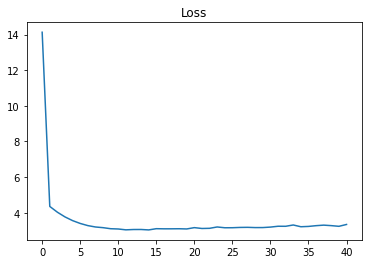

In [ ]:
# plt.plot(losses);
# plt.title('Loss')

In [ ]:
# f1s = [item[2] for item in history]

Text(0.5, 1.0, 'F1 Score')

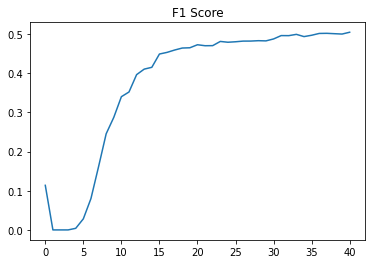

In [ ]:
# plt.plot(f1s)
# plt.title('F1 Score')

## Logistic Regression (Lecture Video)

In [ ]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__() # 這是必需的，否則model = QuoraNet()會出錯
    self.layer1 = nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)
    pass

  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)
    return out

In [ ]:
model = QuoraNet()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# 測試用--查看model的輸入與輸出
for batch in train_dl:
  bi, bt = batch
  print('inputs.shape', bi.shape)
  print('targets.shape', bt.shape)

  bo = model(bi)
  print('bo.shape', bo.shape)
  # print('bo', bo) # 資料顯示量大

  # Convert outputs to probabilities
  # probs = torch.sigmoid(bo)
  probs = torch.sigmoid(bo[:,0]) # 為了顯示方便, [:,0]效果等於flatten 或 [-1,:]
  print('probs', probs[:10])

  # Convert probs to predictions
  preds = (probs > 0.5).int() # ( > 0.5) => True => 1 ;otherwise => False => 0
  print('preds', preds[:10]) # 顯示前十筆資料的預測
  print('targets', bt[:10])  # 顯示前十筆資料的標籤

  # Check metrics
  print('accuracy', accuracy_score(bt, preds))
  print('f1_score', f1_score(bt, preds))

  # Loss
  # print('loss', F.binary_cross_entropy(preds.float() , bt)) # 不行嗎？
  print('loss', F.binary_cross_entropy(probs.float() , bt)) # Lecture修改成這

  break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
bo.shape torch.Size([128, 1])
probs tensor([0.5208, 0.5206, 0.5207, 0.5211, 0.5209, 0.5210, 0.5208, 0.5206, 0.5207,
        0.5209], grad_fn=<SliceBackward0>)
preds tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
targets tensor([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
accuracy 0.03125
f1_score 0.06060606060606061
loss tensor(0.7332, grad_fn=<BinaryCrossEntropyBackward0>)


In [ ]:
# bi[:10]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
# bt[:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# bo[:10]

tensor([[0.0126],
        [0.0104],
        [0.0135],
        [0.0091],
        [0.0122],
        [0.0114],
        [0.0085],
        [0.0099],
        [0.0111],
        [0.0106]], grad_fn=<SliceBackward0>)

In [ ]:
# Evaluate model performance
def evaluate(model, dl):
    """
    輸入:
    模型--model
    dataloader--dl
    輸出:
    loss list
    accuracy list
    f1 list
    """
    losses, accs, f1s = [], [], []

    # Loop over batches
    for batch in dl:

        # Get inputs and targets
        inputs, targets = batch   # 輸出：torch.Size([128, 1000]), torch.Size([128])

        # Pass inputs through model
        out = model(inputs)      # 輸出：torch.Size([128, 1])

        # Convert to probabilities
        probs = torch.sigmoid(out[:,0]) # 使用[:,0]把out降成1維--大小128的vector，用sigmoid轉成probabilities

        # Compute loss
        # loss = F.binary_cross_entropy(probs, targets.float(), weight=None)  # 沒有weight，如果沒weight=None，會有警示
        loss = F.binary_cross_entropy(probs, targets.float(), weight=torch.tensor(20.)) # 有weight
        # losses.append(loss.item())
        # Lecture Video
        losses.append(loss) # loss保持tensor的型態

        # Compute preds
        preds = (probs > 0.5).int() # (判斷式).int() 轉成 0 或 1

        # Compute accuracy & f1 score
        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)

        accs.append(acc)
        f1s.append(f1)

    # (Lecture Video)
    return torch.mean(torch.tensor(losses)).item(), torch.mean(torch.tensor(accs)).item(), torch.mean(torch.tensor(f1s)).item()

    # return np.mean(losses), np.mean(accs), np.mean(f1s)

In [ ]:
# 注意 evaluate() 的  binary_cross_entropy 中 weight=None
evaluate(model, train_dl)

(0.7175797820091248, 0.060229090493601464, 0.11288913898274419)

In [ ]:
# 注意 evaluate() 的  binary_cross_entropy 中 weight=None
evaluate(model, val_dl)

(0.7175556421279907, 0.06073803191489362, 0.11375188015022651)

In [ ]:
# 注意 evaluate() 的  binary_cross_entropy 中 weight=torch.tensor(20.)
evaluate(model, train_dl)

(14.35159969329834, 0.06022500979367982, 0.11283545449628285)

In [ ]:
# 注意 evaluate() 的  binary_cross_entropy 中 weight=torch.tensor(20.)
evaluate(model, val_dl)

(14.351112365722656, 0.06073803191489362, 0.11375188015022651)

<font color="red">以上四個evaluate中不需要重新執行model=QuoraNet()，因為model並沒有改變</font>

In [ ]:
# Train the model batch by batch
def fit(epochs, lr, model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs): # 每一個epoch，會歷遍所有data一次

        # Training Phase
        for batch in train_loader:
            # Get inputs and targets
            inputs, targets = batch     # 輸出：torch.Size([128, 1000]), torch.Size([128])
            # Get model outputs
            out = model(inputs)        # 輸出：torch.Size([128, 1])
            # Get probabilities
            probs = torch.sigmoid(out[:,0])  # 使用[:,0]把out降成1維，用sigmoid轉成probabilities
            # Get the loss/Compute the loss
            loss = F.binary_cross_entropy(probs,
                             targets.float(),
                             weight=torch.tensor(20.)
                             )

            # Performance the optimization
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase/Evaluation phase
        result = evaluate(model, val_loader) # result 包含 平均loss, 平均acc, 平均f1
        loss, acc, f1 = result
        print('Epoch: {}; Loss: {:.4f}; Accuracy: {:.4f}; F1 Score: {:.4f}'.format(
            epoch, loss, acc, f1))
        history.append(result)

    return history

In [ ]:
# 測試用 - 設定 weight=None
# fit(5, 0.001, model, train_dl, val_dl)

Epoch: 0; Loss: 0.1578; Accuracy: 0.9436; F1 Score: 0.3781
Epoch: 1; Loss: 0.1546; Accuracy: 0.9463; F1 Score: 0.3615
Epoch: 2; Loss: 0.1541; Accuracy: 0.9463; F1 Score: 0.4156
Epoch: 3; Loss: 0.1708; Accuracy: 0.9411; F1 Score: 0.4341
Epoch: 4; Loss: 0.2139; Accuracy: 0.9414; F1 Score: 0.3886


[(0.15783916413784027, 0.9436281028368794, 0.3780862622019188),
 (0.15460792183876038, 0.9463209219858155, 0.36148169654526285),
 (0.15408171713352203, 0.9463209219858155, 0.4155732994508438),
 (0.17079348862171173, 0.941123670212766, 0.4340880036325459),
 (0.21391065418720245, 0.9413785460992908, 0.3886262528167169)]

In [ ]:
# 測試用 - 設定 weight=torch.tensor(20.)
model = QuoraNet() # 上一個fit()執行過後model已經是經過訓練了，而不是random initial未訓練的型態，所以需要reset model
fit(5, 0.001, model, train_dl, val_dl)

Epoch: 0; Loss: 3.0952; Accuracy: 0.9447; F1 Score: 0.3933
Epoch: 1; Loss: 3.0644; Accuracy: 0.9459; F1 Score: 0.3703
Epoch: 2; Loss: 3.1541; Accuracy: 0.9452; F1 Score: 0.4135
Epoch: 3; Loss: 3.4738; Accuracy: 0.9444; F1 Score: 0.4097
Epoch: 4; Loss: 4.8521; Accuracy: 0.9425; F1 Score: 0.3602


[(3.095163345336914, 0.9447030141843972, 0.3932684388535381),
 (3.064422130584717, 0.9459109042553191, 0.3702758527144272),
 (3.154085874557495, 0.9451906028368794, 0.4134639104467065),
 (3.473789930343628, 0.9443927304964539, 0.40965245412138124),
 (4.852091312408447, 0.9424756205673759, 0.3601953500761765)]

In [ ]:
# 如果有執行上兩測試中任一個，則要重新設定model  # 有設定 weight=torch.tensor(20.)
model = QuoraNet()

In [ ]:
# evaluate()與fit()都有設定 weight
history = []
history = [evaluate(model, val_dl)]
history

[(14.099971771240234, 0.06073803191489362, 0.11375188015022651)]

In [ ]:
# evaluate()與fit()都有設定 weight
history += fit(5, 0.001, model, train_dl, val_dl)

Epoch: 0; Loss: 3.1411; Accuracy: 0.9450; F1 Score: 0.3348
Epoch: 1; Loss: 3.0516; Accuracy: 0.9459; F1 Score: 0.4093
Epoch: 2; Loss: 3.1910; Accuracy: 0.9430; F1 Score: 0.4414
Epoch: 3; Loss: 3.6191; Accuracy: 0.9423; F1 Score: 0.3908
Epoch: 4; Loss: 5.1396; Accuracy: 0.9415; F1 Score: 0.3507


In [ ]:
# evaluate()與fit()都有設定 weight
history += fit(5, 0.0001, model, train_dl, val_dl)

Epoch: 0; Loss: 6.0041; Accuracy: 0.9394; F1 Score: 0.3847
Epoch: 1; Loss: 6.5443; Accuracy: 0.9403; F1 Score: 0.3770
Epoch: 2; Loss: 6.9202; Accuracy: 0.9401; F1 Score: 0.3749
Epoch: 3; Loss: 7.3856; Accuracy: 0.9418; F1 Score: 0.3664
Epoch: 4; Loss: 7.7171; Accuracy: 0.9411; F1 Score: 0.3658


In [ ]:
history

[(14.099971771240234, 0.06073803191489362, 0.11375188015022651),
 (3.141113519668579, 0.9450354609929078, 0.3348295935157802),
 (3.051630973815918, 0.9459219858156028, 0.409347654090081),
 (3.1909923553466797, 0.943040780141844, 0.4413690307135002),
 (3.619147300720215, 0.9422872340425532, 0.3908152268461494),
 (5.139589309692383, 0.9414893617021277, 0.35065535422519123),
 (6.004113674163818, 0.9393949468085107, 0.38473585611446154),
 (6.544315814971924, 0.9402593085106383, 0.37702355698848744),
 (6.920178413391113, 0.940093085106383, 0.37488676164389223),
 (7.385636806488037, 0.9417774822695036, 0.3664435766240654),
 (7.717110633850098, 0.941123670212766, 0.3658363497003044)]

In [ ]:
losses = [item[0] for item in history]
accs = [item[1] for item in history]
f1s = [item[2] for item in history]

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss')

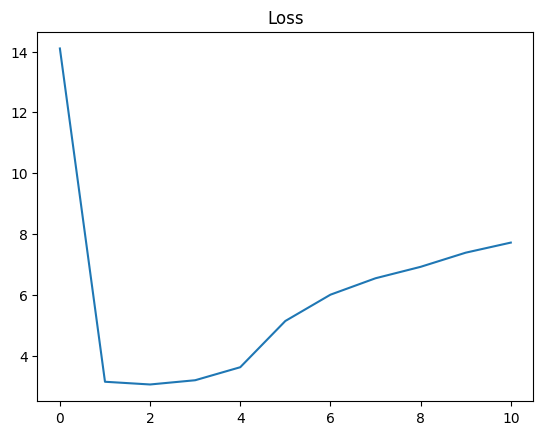

In [ ]:
plt.plot(losses);
plt.title('Loss')

Text(0.5, 1.0, 'Accuracy')

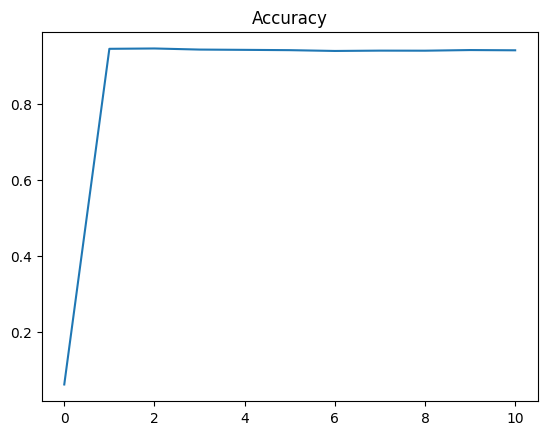

In [ ]:
plt.plot(accs)
plt.title('Accuracy')

Text(0.5, 1.0, 'F1 Score')

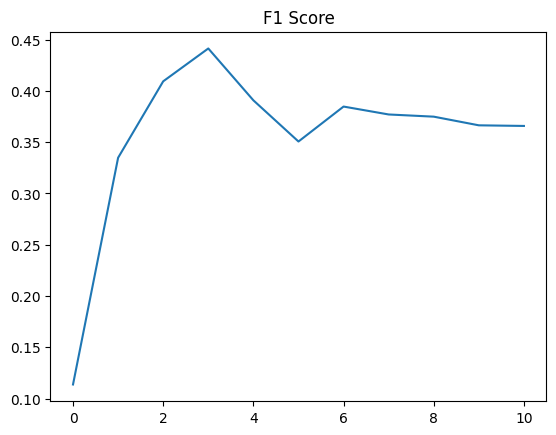

In [ ]:
plt.plot(f1s)
plt.title('F1 Score')

## Feed Forward Neural Network

In [ ]:
import torch.nn.functional as F

In [ ]:
class FeedForwardModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(1000, 512)
    self.linear2 = nn.Linear(512, 256)
    self.linear3 = nn.Linear(256, 128)
    self.linear4 = nn.Linear(128, 1)

  def forward(self, xb):
    out = F.relu(self.linear1(xb))
    out = F.relu(self.linear2(out))
    out = F.relu(self.linear3(out))
    out = self.linear4(out)
    return out

In [ ]:
ff_model = FeedForwardModel()

In [ ]:
history = [evaluate(ff_model, val_dl)]

In [ ]:
history

[(13.31828673342441, 0.9392619680851064, 0.0)]

In [ ]:
%%time
history += fit(5, 0.001, ff_model, train_dl, val_dl)

Epoch: 0; Loss: 3.1960; Accuracy: 0.9421; F1 Score: 0.4435
Epoch: 1; Loss: 3.1660; Accuracy: 0.9396; F1 Score: 0.4819
Epoch: 2; Loss: 3.2548; Accuracy: 0.9350; F1 Score: 0.4901
Epoch: 3; Loss: 3.5200; Accuracy: 0.9279; F1 Score: 0.4879
Epoch: 4; Loss: 3.5221; Accuracy: 0.9279; F1 Score: 0.4917
CPU times: user 4min 26s, sys: 3.06 s, total: 4min 29s
Wall time: 1min 7s


## Make Predictions on example data (Lecture Video)

In [ ]:
# 查看一下
# small_df = raw_df.sample(10)

In [ ]:
# 查看一下
# small_df

,qid,question_text,target
1091314,d5de76242913c2ef2ff4,What is obsessive thinking?,0
964922,bd0bcad229749ba09016,Can we apply B. Arch in recorrection of JEE ma...,0
77602,0f30b2cd988bb8f7ac51,How can I make turkey breast steaks flavorful?,0
158821,1f102f1fee9f06f1f28b,Is it necessary to add two ounces of salt to t...,0
812490,9f30be8fc6b3aaf672a2,What courses are to be done by non CSE student...,0
773502,97872534c79b920ab69b,What was ur schedule as a partial dropper? Whe...,0
313744,3d7a242b82a942546141,How do I ask out a girl who once said no becau...,0
1192511,e9b5cbcc86aced1de256,How do I start a romantic relationship with an...,0
687219,86992a635f0a2c484e4e,How should I invest is cryptocurrency if I hav...,0
986106,c1308a4e65ea9dbeebc8,What is the difference of Water Rowing machine...,0


In [ ]:
"""用來對DataFrame的資料做出預測"""
def predict_df(df):
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [ ]:
# small_df.target.values

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
# predict_df(small_df)

tensor([0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

In [ ]:
# small_df.question_text.values

array(['Is buying items from bulk bins with reusable containers more environmentally friendly than buying products in recyclable packaging?',
       'Does Mars have more water than Bangalore?',
       'Why do you think that there are so many ignorant questions on Quora, like ones that really appear designed to wind people up?',
       "Why Muslim women's get themselves clad in full cover black burka and stay at home when other women's toil in farms in developing countries?",
       'Is the GOP going to get away with this "Secret Society" in the FBI ruse?',
       'If I change my Google password, will my YouTube account (with the email) be logged out on all devices too?',
       'What does "his snout is shorter and wider, built to crush bone" mean?',
       'I need to change my car tyres for Swift ZXI 2010 model (Tyre Size - 185/70 R14). Which should I opt for, Bridgestone, Michelin, Yokohama or MRF?',
       'How does it feel to be born?',
       'How can I get my duplicate grade sheet

In [ ]:
"""用來對一筆資料(一句子)做出預測"""
def predict_text(text):
  df = pd.DataFrame({'question_text': [text]})
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [ ]:
# predict_text("What is the function of a plasma cell?")

tensor([0], dtype=torch.int32)

In [ ]:
# predict_text("Why can't liberals realize that they're stupid?")

tensor([1], dtype=torch.int32)

In [ ]:
# list(predict_text("Why can't liberals realize that they're stupid?").detach().numpy())

[1]

## Generate Predictions for Test Set (Lecture Video)

In [ ]:
# test_inputs

<375806x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1964864 stored elements in Compressed Sparse Row format>

In [ ]:
"""用來對DataLoader的資料做出預測"""
def make_preds(dl):
  all_preds = []
  for batch in dl:
    inputs = batch[0]
    outputs = model(inputs)
    probs = torch.sigmoid(outputs[:,0])
    preds = (probs > 0.5).int()
    all_preds += list(preds.detach().numpy())
  return all_preds

In [ ]:
test_preds = make_preds(test_dl)

In [ ]:
# len(test_preds)

375806

In [ ]:
# test_preds[:5]

[0, 0, 1, 0, 0]

In [ ]:
# sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,1
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction = test_preds

In [ ]:
# sub_df.prediction.value_counts()

0    362942
1     12864
Name: prediction, dtype: int64

In [ ]:
sub_df.to_csv('submission.csv', index=None)

## Make Predictions and Submit
<font color="red">Kaggle Kernel一定要用到此節--<br>
若要使用LogReg模型，要設定:<br>
`test_preds = predict(LogReg, test_dl)`<br>
若要使用ff_model模型，要設定:<br>
`test_preds = predict(ff_model, test_dl)`<br>
</font>

In [ ]:
test_tensors = torch.tensor(test_inputs.toarray()).float()

In [ ]:
test_ds = TensorDataset(test_tensors)

In [ ]:
test_dl = DataLoader(test_ds, batch_size)

In [ ]:
def predict(model, dl):
    all_preds = []
    for batch in dl:
        inputs, = batch
        out = model(inputs)
        probs = torch.sigmoid(out)[:,0]
        preds = (probs > 0.5).int()
        all_preds += list(preds.numpy())
    return all_preds

In [ ]:
# test_preds = predict(LogReg, test_dl)

test_preds = predict(ff_model, test_dl)

In [ ]:
# test_preds[:20]

[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [ ]:
# sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction = test_preds

In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

qid,prediction
0000163e3ea7c7a74cd7,1
00002bd4fb5d505b9161,0
00007756b4a147d2b0b3,1
000086e4b7e1c7146103,0
0000c4c3fbe8785a3090,1
000101884c19f3515c1a,0
00010f62537781f44a47,0
00012afbd27452239059,0
00014894849d00ba98a9,1


## <font color="green">補充</font>

<font color="red">補充升維與降維範例

```python
tem1 =torch.rand(3,1)
a=tem1[:,0]    # 降維成1維
b=tem1.flatten() # 降維成1維
"""a與b結果相同"""
c=a.reshape(-1,1) # 升維成2維

```